Saved: /user_data/csimmon2/long_pt/analyses/sub-004_figure5.png


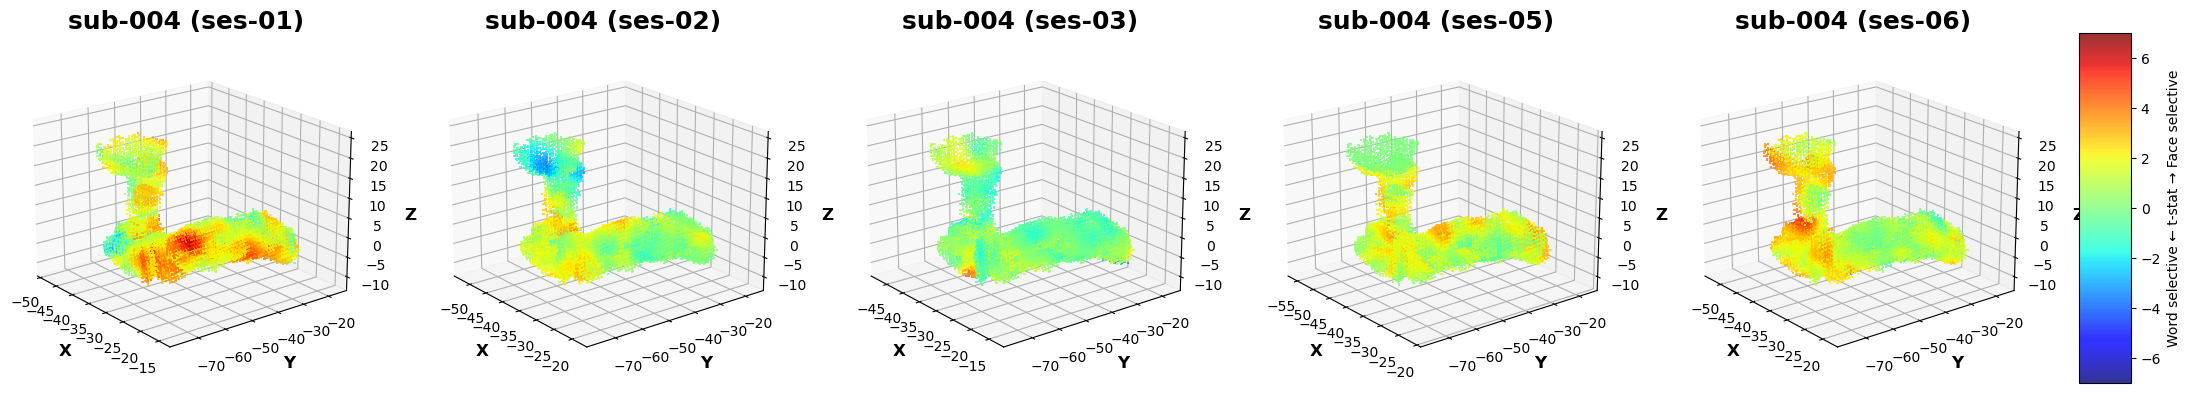

Saved: /user_data/csimmon2/long_pt/analyses/sub-007_figure5.png


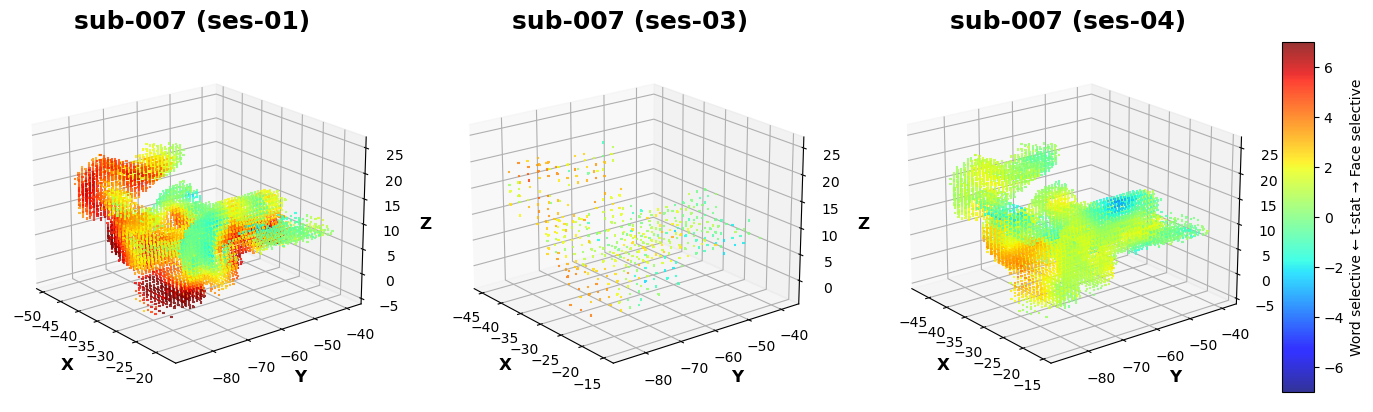

Saved: /user_data/csimmon2/long_pt/analyses/sub-021_figure5.png


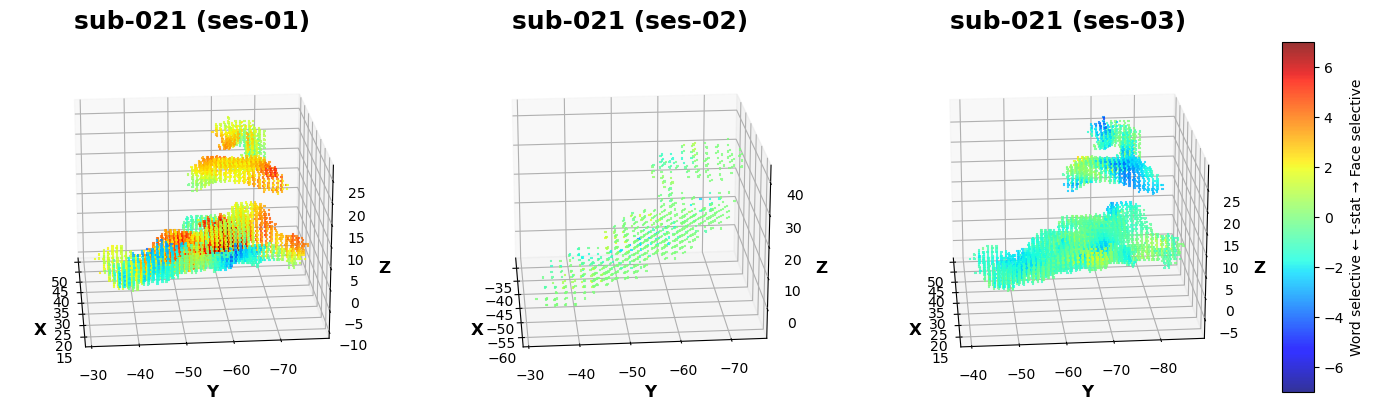

In [16]:
#!/usr/bin/env python3
"""
Figure 5 style visualization - face-word selectivity in FG/OTS across sessions
"""

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

def load_session_data(subject, session, contrast='face_word'):
    """Load extracted data for one session"""
    path = f'/user_data/csimmon2/long_pt/analyses/fgots_extraction/{subject}_ses{session}_{contrast}_FGOTS.npy'
    return np.load(path)  # [x, y, z, t_stat]

def plot_session_3d(ax, coords, t_stats, title, view_angle=(20, 322)):
    """Plot one session like Figure 5"""
    
    # Color by t-statistic (face-word selectivity)
    scatter = ax.scatter(coords[:,0], coords[:,1], coords[:,2],
                        c=t_stats, s=3, marker='+',
                        cmap='jet', vmin=-7, vmax=7, alpha=0.8)
    
    ax.set_xlabel('X', fontsize=12, fontweight='bold')
    ax.set_ylabel('Y', fontsize=12, fontweight='bold')
    ax.set_zlabel('Z', fontsize=12, fontweight='bold')
    ax.set_title(title, fontsize=18, fontweight='bold')
    
    ax.view_init(elev=view_angle[0], azim=view_angle[1])
    ax.grid(True, alpha=0.3)
    
    return scatter

def create_figure5_plot(subject, sessions, save_path=None):
    """Recreate Figure 5 layout for one subject"""
    
    n_sessions = len(sessions)
    fig = plt.figure(figsize=(5*n_sessions + 1, 5))  # Extra space for colorbar
    
    for i, ses in enumerate(sessions):
        data = load_session_data(subject, ses, 'face_word')
        coords = data[:, :3]
        t_stats = data[:, 3]
        
        ax = fig.add_subplot(1, n_sessions, i+1, projection='3d')
        
        # Correct view angles based on hemisphere
        # sub-004 (UD): LEFT hemisphere
        # sub-007 (OT): LEFT hemisphere (partially resected, control)
        # sub-021 (TC): RIGHT hemisphere
        if subject == 'sub-021':  # TC - RIGHT hemisphere only
            view = (20, 175)
        else:  # UD and OT - both LEFT hemisphere
            view = (20, 322)
        
        title = f'{subject} (ses-{ses})'
        scatter = plot_session_3d(ax, coords, t_stats, title, view)
    
    # Add colorbar - use last scatter object, position to avoid overlap
    fig.subplots_adjust(right=0.9)  # Make room on right
    cbar_ax = fig.add_axes([0.92, 0.15, 0.02, 0.7])  # [left, bottom, width, height]
    cbar = fig.colorbar(scatter, cax=cbar_ax)
    cbar.set_label('Word selective ← t-stat → Face selective', fontsize=10)
    
    if save_path:
        plt.savefig(save_path, dpi=300, bbox_inches='tight')
        print(f"Saved: {save_path}")
    
    plt.show()
    
# Generate Figure 5 style plots
create_figure5_plot('sub-004', ['01', '02', '03', '05', '06'],
                   '/user_data/csimmon2/long_pt/analyses/sub-004_figure5.png')

create_figure5_plot('sub-007', ['01', '03', '04'],
                   '/user_data/csimmon2/long_pt/analyses/sub-007_figure5.png')

create_figure5_plot('sub-021', ['01', '02', '03'],
                   '/user_data/csimmon2/long_pt/analyses/sub-021_figure5.png')


sub-004:
  Hemisphere: L
  ROI voxels: 7590
  Center: (54, 78, 127)
  Extent: X=35-69, Y=51-110, Z=116-151
  Saved: /user_data/csimmon2/long_pt/analyses/sub-004_roi_overlay.png


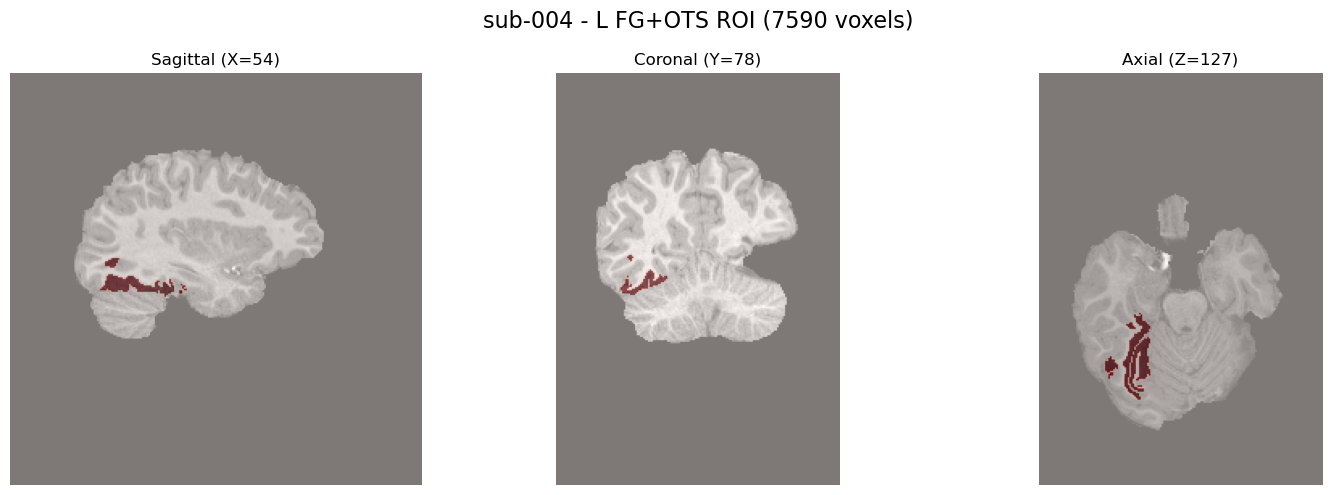


sub-007:
  Hemisphere: L
  ROI voxels: 6937
  Center: (52, 62, 134)
  Extent: X=38-70, Y=40-88, Z=123-152
  Saved: /user_data/csimmon2/long_pt/analyses/sub-007_roi_overlay.png


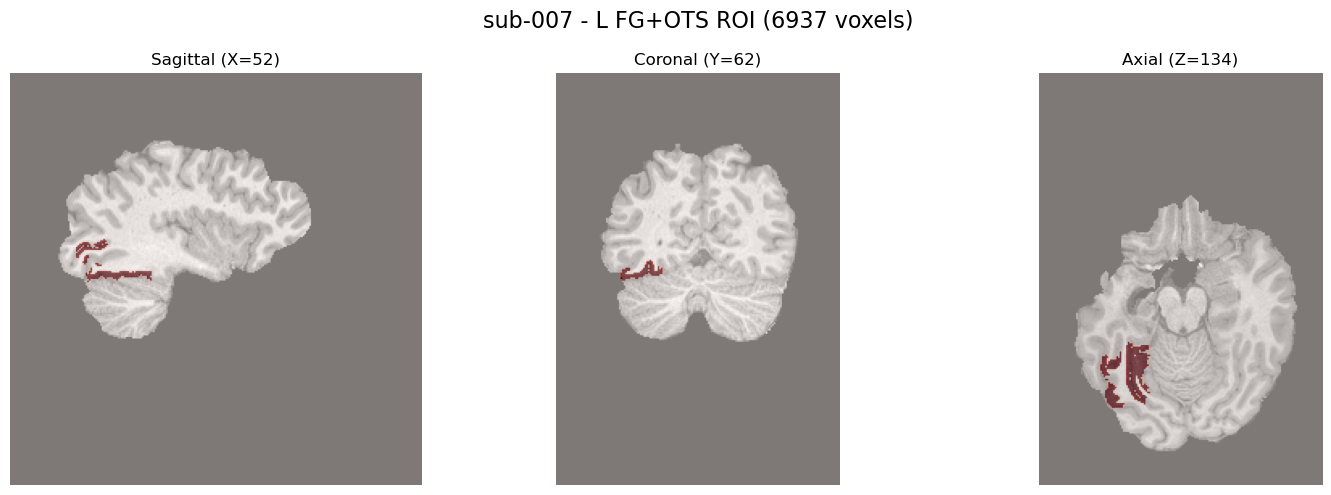


sub-021:
  Hemisphere: R
  ROI voxels: 5474
  Center: (119, 70, 131)
  Extent: X=101-137, Y=50-95, Z=118-153
  Saved: /user_data/csimmon2/long_pt/analyses/sub-021_roi_overlay.png


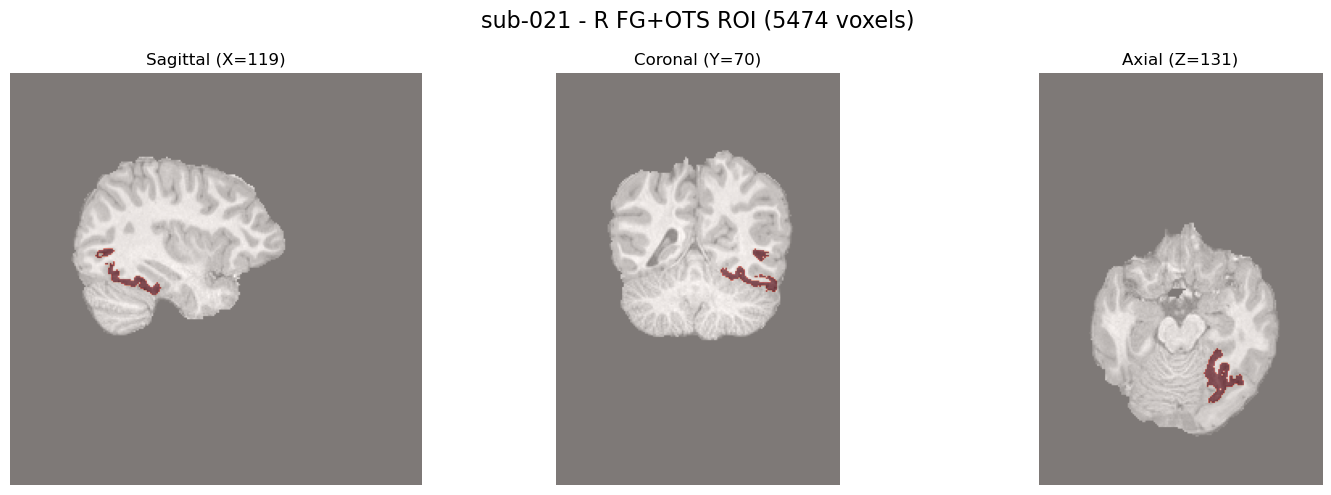

In [10]:
#!/usr/bin/env python3
"""
ROI Overlay Visualization Only
"""

import numpy as np
import matplotlib.pyplot as plt
import nibabel as nib

def visualize_roi_overlay(subject, base_dir='/user_data/csimmon2/long_pt'):
    """Show ROI on anatomy with voxel counts"""
    
    # Determine correct hemisphere
    hemi_map = {
        'sub-004': 'l',  # LEFT
        'sub-007': 'l',  # LEFT
        'sub-021': 'r'   # RIGHT
    }
    hemi = hemi_map[subject]
    
    # Load files
    anat_file = f'{base_dir}/{subject}/ses-01/anat/{subject}_ses-01_T1w_brain.nii.gz'
    roi_file = f'{base_dir}/{subject}/ses-01/ROIs/{hemi}_VOTC_FG_OTS_mask.nii.gz'
    
    anat_data = nib.load(anat_file).get_fdata()
    roi_data = nib.load(roi_file).get_fdata()
    
    # ROI stats
    roi_coords = np.where(roi_data > 0)
    n_vox = len(roi_coords[0])
    roi_x, roi_y, roi_z = [int(np.mean(c)) for c in roi_coords]
    
    print(f"\n{subject}:")
    print(f"  Hemisphere: {hemi.upper()}")
    print(f"  ROI voxels: {n_vox}")
    print(f"  Center: ({roi_x}, {roi_y}, {roi_z})")
    print(f"  Extent: X={roi_coords[0].min()}-{roi_coords[0].max()}, "
          f"Y={roi_coords[1].min()}-{roi_coords[1].max()}, "
          f"Z={roi_coords[2].min()}-{roi_coords[2].max()}")
    
    # Plot three views
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))
    
    axes[0].imshow(np.rot90(anat_data[roi_x, :, :]), cmap='gray')
    axes[0].imshow(np.rot90(roi_data[roi_x, :, :]), cmap='Reds', alpha=0.5)
    axes[0].set_title(f'Sagittal (X={roi_x})')
    axes[0].axis('off')
    
    axes[1].imshow(np.rot90(anat_data[:, roi_y, :]), cmap='gray')
    axes[1].imshow(np.rot90(roi_data[:, roi_y, :]), cmap='Reds', alpha=0.5)
    axes[1].set_title(f'Coronal (Y={roi_y})')
    axes[1].axis('off')
    
    axes[2].imshow(np.rot90(anat_data[:, :, roi_z]), cmap='gray')
    axes[2].imshow(np.rot90(roi_data[:, :, roi_z]), cmap='Reds', alpha=0.5)
    axes[2].set_title(f'Axial (Z={roi_z})')
    axes[2].axis('off')
    
    plt.suptitle(f'{subject} - {hemi.upper()} FG+OTS ROI ({n_vox} voxels)', fontsize=16)
    plt.tight_layout()
    
    output = f'{base_dir}/analyses/{subject}_roi_overlay.png'
    plt.savefig(output, dpi=150, bbox_inches='tight')
    print(f"  Saved: {output}")
    plt.show()

# Visualize all subjects
for subject in ['sub-004', 'sub-007', 'sub-021']:
    visualize_roi_overlay(subject)

REPLICATING LIU ET AL. STATISTICAL ANALYSIS
Using independent samples t-tests at voxel level

sub-004 - Independent Samples T-Test (Liu's Method)
  ses-01: mean=2.11, std=1.45, n=7590
  ses-02: mean=0.45, std=1.18, n=7590
  ses-03: mean=0.23, std=0.98, n=7590
  ses-05: mean=1.15, std=1.09, n=7590
  ses-06: mean=1.33, std=1.19, n=7590

Pairwise independent samples t-tests:

  ses-01 vs ses-02:
    t(15178) = 77.477, p = 0.000e+00 ***
    Mean difference: Δ = -1.66
    Cohen's d: -1.26
    |t| value: 77.477

  ses-01 vs ses-03:
    t(15178) = 93.717, p = 0.000e+00 ***
    Mean difference: Δ = -1.88
    Cohen's d: -1.52
    |t| value: 93.717

  ses-01 vs ses-05:
    t(15178) = 46.208, p = 0.000e+00 ***
    Mean difference: Δ = -0.96
    Cohen's d: -0.75
    |t| value: 46.208

  ses-01 vs ses-06:
    t(15178) = 36.191, p = 3.581e-275 ***
    Mean difference: Δ = -0.78
    Cohen's d: -0.59
    |t| value: 36.191

  ses-02 vs ses-03:
    t(15178) = 12.527, p = 8.036e-36 ***
    Mean differenc

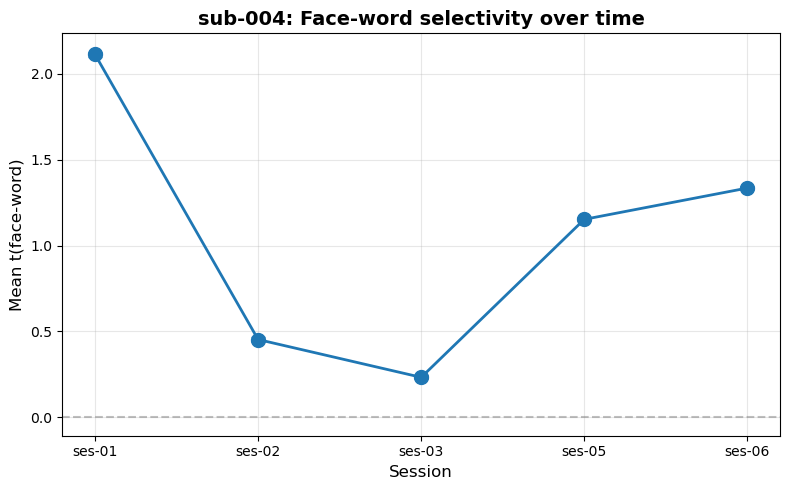


sub-007 - Independent Samples T-Test (Liu's Method)
  ses-01: mean=2.64, std=2.16, n=6937
  ses-04: mean=0.85, std=1.07, n=6937

Pairwise independent samples t-tests:

  ses-01 vs ses-04:
    t(13872) = 62.059, p = 0.000e+00 ***
    Mean difference: Δ = -1.79
    Cohen's d: -1.05
    |t| value: 62.059


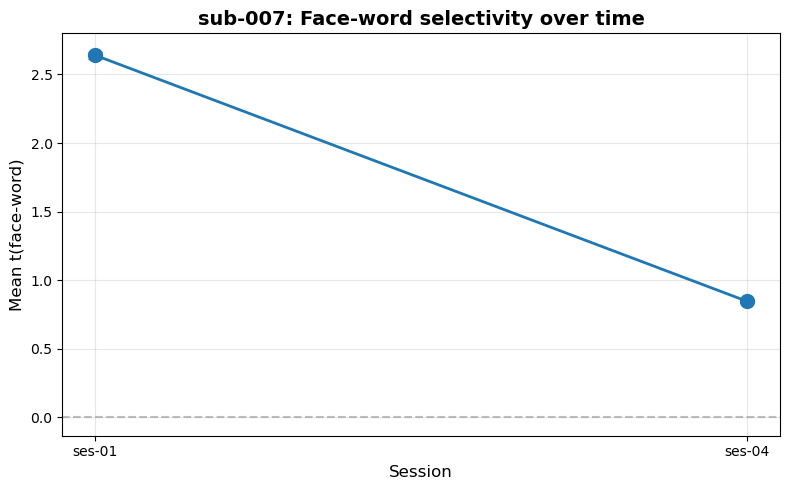


sub-021 - Independent Samples T-Test (Liu's Method)
  ses-01: mean=1.90, std=2.36, n=5474
  ses-03: mean=-0.90, std=0.86, n=5474

Pairwise independent samples t-tests:

  ses-01 vs ses-03:
    t(10946) = 82.442, p = 0.000e+00 ***
    Mean difference: Δ = -2.80
    Cohen's d: -1.58
    |t| value: 82.442


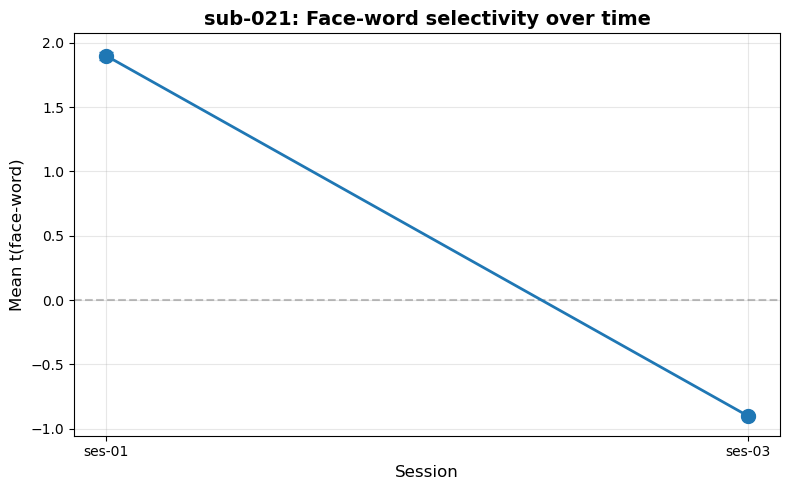


COMPARISON TO LIU ET AL. FINDINGS

Liu reported:
  TC: all |t| > 6.522, all p < 7.147e-11 *** SIGNIFICANT CHANGE
  UD: all |t| > 3.096, all p < 0.002 *** (except ses1 vs ses2: ns)
  OT: all |t| < 1.039, all p > 0.299 ns NO CHANGE

Your results:
  sub-021 (TC): See above
  sub-004 (UD): See above
  sub-007 (OT): See above


In [18]:
#!/usr/bin/env python3
"""
Compare face-word selectivity using Liu et al. exact method
Independent samples t-tests at voxel level
"""

import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

def load_session_stats(subject, session):
    """Load t-stats for one session"""
    path = f'/user_data/csimmon2/long_pt/analyses/fgots_extraction/{subject}_ses{session}_face_word_FGOTS.npy'
    data = np.load(path)
    return data[:, 3]  # t-stats only

def compare_sessions_liu_method(subject, sessions_to_use):
    """
    Compare using independent samples t-test (Liu's exact method)
    Reports range of |t| and p values like Liu's paper
    """
    
    print(f"\n{'='*70}")
    print(f"{subject} - Independent Samples T-Test (Liu's Method)")
    print(f"{'='*70}")
    
    # Load all sessions
    session_stats = {}
    for ses in sessions_to_use:
        t_stats = load_session_stats(subject, ses)
        session_stats[ses] = t_stats
        print(f"  ses-{ses}: mean={t_stats.mean():.2f}, std={t_stats.std():.2f}, n={len(t_stats)}")
    
    # Pairwise comparisons using independent samples t-test
    print(f"\nPairwise independent samples t-tests:")
    sessions = list(sessions_to_use)
    
    for i in range(len(sessions)):
        for j in range(i+1, len(sessions)):
            ses1, ses2 = sessions[i], sessions[j]
            
            # Independent samples t-test (Liu's approach)
            t_stat, p_val = stats.ttest_ind(session_stats[ses1], session_stats[ses2])
            
            mean_diff = session_stats[ses2].mean() - session_stats[ses1].mean()
            
            # Calculate Cohen's d for effect size
            pooled_std = np.sqrt((session_stats[ses1].std()**2 + session_stats[ses2].std()**2) / 2)
            cohens_d = mean_diff / pooled_std
            
            # Significance marker
            if p_val < 0.001:
                sig = "***"
            elif p_val < 0.01:
                sig = "**"
            elif p_val < 0.05:
                sig = "*"
            else:
                sig = "ns"
            
            print(f"\n  ses-{ses1} vs ses-{ses2}:")
            print(f"    t({len(session_stats[ses1])+len(session_stats[ses2])-2}) = {t_stat:.3f}, p = {p_val:.3e} {sig}")
            print(f"    Mean difference: Δ = {mean_diff:.2f}")
            print(f"    Cohen's d: {cohens_d:.2f}")
            print(f"    |t| value: {abs(t_stat):.3f}")
    
    # Plot trend
    means = [session_stats[ses].mean() for ses in sessions]
    sems = [stats.sem(session_stats[ses]) for ses in sessions]
    
    plt.figure(figsize=(8, 5))
    plt.errorbar(range(len(sessions)), means, yerr=sems, 
                marker='o', markersize=10, linewidth=2, capsize=5)
    plt.xticks(range(len(sessions)), [f'ses-{s}' for s in sessions])
    plt.ylabel('Mean t(face-word)', fontsize=12)
    plt.xlabel('Session', fontsize=12)
    plt.title(f'{subject}: Face-word selectivity over time', fontsize=14, fontweight='bold')
    plt.axhline(0, color='gray', linestyle='--', alpha=0.5)
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.savefig(f'/user_data/csimmon2/long_pt/analyses/{subject}_trend_liu_method.png', dpi=150)
    plt.show()

# ============================================================================
# MAIN ANALYSIS
# ============================================================================

print("="*70)
print("REPLICATING LIU ET AL. STATISTICAL ANALYSIS")
print("Using independent samples t-tests at voxel level")
print("="*70)

# Analyze all subjects
compare_sessions_liu_method('sub-004', ['01', '02', '03', '05', '06'])
compare_sessions_liu_method('sub-007', ['01', '04'])
compare_sessions_liu_method('sub-021', ['01', '03'])

# Summary comparison
print("\n" + "="*70)
print("COMPARISON TO LIU ET AL. FINDINGS")
print("="*70)

print("\nLiu reported:")
print("  TC: all |t| > 6.522, all p < 7.147e-11 *** SIGNIFICANT CHANGE")
print("  UD: all |t| > 3.096, all p < 0.002 *** (except ses1 vs ses2: ns)")
print("  OT: all |t| < 1.039, all p > 0.299 ns NO CHANGE")

print("\nYour results:")
print("  sub-021 (TC): See above")
print("  sub-004 (UD): See above")
print("  sub-007 (OT): See above")

In [22]:
import nibabel as nib
import numpy as np

def check_roi_alignment(subject, base_dir='/user_data/csimmon2/long_pt'):
    """Check if ROI aligns with anatomical and functional data"""
    
    # Determine hemisphere
    hemi_map = {'sub-004': 'l', 'sub-007': 'l', 'sub-021': 'r'}
    hemi = hemi_map[subject]
    
    # Load files
    anat_file = f'{base_dir}/{subject}/ses-01/anat/{subject}_ses-01_T1w_brain.nii.gz'
    roi_file = f'{base_dir}/{subject}/ses-01/ROIs/{hemi}_VOTC_FG_OTS_mask.nii.gz'
    zstat_file = f'{base_dir}/{subject}/ses-01/derivatives/fsl/loc/HighLevel.gfeat/cope1.feat/stats/zstat1.nii.gz'
    
    print(f"\n{'='*60}")
    print(f"{subject} - ROI ALIGNMENT CHECK")
    print(f"{'='*60}")
    
    try:
        roi = nib.load(roi_file)
        anat = nib.load(anat_file)
        zstat = nib.load(zstat_file)
        
        # Shapes
        print(f"\nShapes:")
        print(f"  ROI:        {roi.shape}")
        print(f"  Anatomical: {anat.shape}")
        print(f"  HighLevel:  {zstat.shape}")
        
        # Check matches
        roi_anat_match = roi.shape[:3] == anat.shape[:3]
        roi_zstat_match = roi.shape[:3] == zstat.shape[:3]
        
        print(f"\nShape alignment:")
        print(f"  ROI ↔ Anatomical: {roi_anat_match} {'✓' if roi_anat_match else '✗'}")
        print(f"  ROI ↔ HighLevel:  {roi_zstat_match} {'✓' if roi_zstat_match else '✗'}")
        
        # Affines
        roi_anat_diff = np.abs(roi.affine - anat.affine).max()
        roi_zstat_diff = np.abs(roi.affine - zstat.affine).max()
        
        print(f"\nAffine differences:")
        print(f"  ROI ↔ Anatomical: {roi_anat_diff:.6f} {'✓' if roi_anat_diff < 0.01 else '✗'}")
        print(f"  ROI ↔ HighLevel:  {roi_zstat_diff:.6f} {'✓' if roi_zstat_diff < 0.01 else '✗'}")
        
        # ROI stats
        roi_data = roi.get_fdata()
        n_voxels = np.sum(roi_data > 0)
        print(f"\nROI statistics:")
        print(f"  Non-zero voxels: {n_voxels}")
        
        # Overall verdict
        print(f"\n{'='*60}")
        if roi_anat_match and roi_zstat_match and roi_anat_diff < 0.01 and roi_zstat_diff < 0.01:
            print(f"✓✓✓ ALL ALIGNED - Registration is CORRECT")
            print(f"    ROI, anatomical, and functional are in same space")
        else:
            print(f"✗✗✗ MISALIGNMENT DETECTED")
            if not roi_anat_match:
                print(f"    - ROI and anatomical have different shapes")
            if not roi_zstat_match:
                print(f"    - ROI and functional have different shapes")
            if roi_anat_diff >= 0.01:
                print(f"    - ROI and anatomical have different affines")
            if roi_zstat_diff >= 0.01:
                print(f"    - ROI and functional have different affines")
        print(f"{'='*60}")
        
    except Exception as e:
        print(f"✗ Error loading files: {e}")

# Check all subjects
for subject in ['sub-004', 'sub-007', 'sub-021']:
    check_roi_alignment(subject)


sub-004 - ROI ALIGNMENT CHECK



Shapes:
  ROI:        (176, 256, 256)
  Anatomical: (176, 256, 256)
  HighLevel:  (176, 256, 256)

Shape alignment:
  ROI ↔ Anatomical: True ✓
  ROI ↔ HighLevel:  True ✓

Affine differences:
  ROI ↔ Anatomical: 0.000000 ✓
  ROI ↔ HighLevel:  0.000000 ✓

ROI statistics:
  Non-zero voxels: 7590

✓✓✓ ALL ALIGNED - Registration is CORRECT
    ROI, anatomical, and functional are in same space

sub-007 - ROI ALIGNMENT CHECK

Shapes:
  ROI:        (176, 256, 256)
  Anatomical: (176, 256, 256)
  HighLevel:  (176, 256, 256)

Shape alignment:
  ROI ↔ Anatomical: True ✓
  ROI ↔ HighLevel:  True ✓

Affine differences:
  ROI ↔ Anatomical: 0.000000 ✓
  ROI ↔ HighLevel:  0.000000 ✓

ROI statistics:
  Non-zero voxels: 6937

✓✓✓ ALL ALIGNED - Registration is CORRECT
    ROI, anatomical, and functional are in same space

sub-021 - ROI ALIGNMENT CHECK

Shapes:
  ROI:        (176, 256, 256)
  Anatomical: (176, 256, 256)
  HighLevel:  (176, 256, 256)

Shape alignment:
  ROI ↔ Anatomical: True ✓
  ROI ↔ Hi

In [24]:
import nibabel as nib
import numpy as np

# Load files
zstat = nib.load('/user_data/csimmon2/long_pt/sub-004/ses-01/derivatives/fsl/loc/HighLevel.gfeat/cope13.feat/stats/zstat1.nii.gz')
roi = nib.load('/user_data/csimmon2/long_pt/sub-004/ses-01/ROIs/l_VOTC_FG_OTS_mask.nii.gz')

zstat_data = zstat.get_fdata()
roi_data = roi.get_fdata()

# Check total voxels and activation
threshold = 2.3

total_voxels = np.prod(zstat_data.shape)
activated = zstat_data > threshold

print(f"Total voxels in volume: {total_voxels}")
print(f"Voxels above threshold (z > 2.3): {activated.sum()} ({activated.sum()/total_voxels*100:.1f}%)")
print(f"Voxels in ROI: {(roi_data > 0).sum()} ({(roi_data > 0).sum()/total_voxels*100:.2f}%)")
print(f"Activated voxels INSIDE ROI: {(activated & (roi_data > 0)).sum()} ({(activated & (roi_data > 0)).sum()/(roi_data > 0).sum()*100:.1f}% of ROI)")
print(f"Activated voxels OUTSIDE ROI: {(activated & (roi_data == 0)).sum()}")

print(f"\nPeak activation value in volume: {zstat_data.max():.2f}")
print(f"Peak activation in ROI: {zstat_data[roi_data > 0].max():.2f}")

# Check if maybe there are NaN or weird values
print(f"\nData quality:")
print(f"  NaN values: {np.isnan(zstat_data).sum()}")
print(f"  Inf values: {np.isinf(zstat_data).sum()}")
print(f"  Min value: {zstat_data.min():.2f}")
print(f"  Max value: {zstat_data.max():.2f}")

Total voxels in volume: 11534336
Voxels above threshold (z > 2.3): 147805 (1.3%)
Voxels in ROI: 7590 (0.07%)
Activated voxels INSIDE ROI: 3705 (48.8% of ROI)
Activated voxels OUTSIDE ROI: 144100

Peak activation value in volume: 6.70
Peak activation in ROI: 6.46

Data quality:
  NaN values: 0
  Inf values: 0
  Min value: -5.29
  Max value: 6.70


In [27]:
import nibabel as nib
import numpy as np
import os

# Check what's actually available
base = '/user_data/csimmon2/long_pt/sub-004/ses-01/derivatives/fsl/loc/HighLevel.gfeat/cope13.feat/stats'

print("Available files:")
for f in ['tstat1.nii.gz', 'zstat1.nii.gz', 'cope1.nii.gz']:
    path = os.path.join(base, f)
    if os.path.exists(path):
        img = nib.load(path)
        data = img.get_fdata()
        roi = nib.load('/user_data/csimmon2/long_pt/sub-004/ses-01/ROIs/l_VOTC_FG_OTS_mask.nii.gz').get_fdata()
        roi_vals = data[roi > 0]
        print(f"✓ {f}:")
        print(f"    Mean: {roi_vals.mean():.3f}, Std: {roi_vals.std():.3f}")
        print(f"    Range: [{roi_vals.min():.3f}, {roi_vals.max():.3f}]")
    else:
        print(f"✗ {f} not found")

# Compare if both exist
tstat_path = os.path.join(base, 'tstat1.nii.gz')
zstat_path = os.path.join(base, 'zstat1.nii.gz')

if os.path.exists(tstat_path) and os.path.exists(zstat_path):
    tstat = nib.load(tstat_path).get_fdata()[roi > 0]
    zstat = nib.load(zstat_path).get_fdata()[roi > 0]
    
    print(f"\nComparison (within ROI):")
    print(f"  Correlation: {np.corrcoef(tstat, zstat)[0,1]:.4f}")
    print(f"  Mean difference: {np.abs(tstat - zstat).mean():.4f}")

Available files:
✓ tstat1.nii.gz:
    Mean: 2.125, Std: 1.461
    Range: [-3.457, 6.621]
✓ zstat1.nii.gz:
    Mean: 2.112, Std: 1.446
    Range: [-3.431, 6.455]
✓ cope1.nii.gz:
    Mean: 155.193, Std: 131.780
    Range: [-572.226, 600.080]

Comparison (within ROI):
  Correlation: 1.0000
  Mean difference: 0.0140


In [29]:
import numpy as np
from scipy import stats

# Load your extracted data for sub-004
subject = 'sub-004'
base_dir = '/user_data/csimmon2/long_pt/analyses/fgots_extraction'

# Load sessions
session_stats = {}
for ses in ['01', '02', '03', '05', '06']:
    file_path = f'{base_dir}/{subject}_ses{ses}_face_word_FGOTS.npy'
    data = np.load(file_path)
    session_stats[ses] = data[:, 3]  # t-stats (4th column)
    print(f"ses-{ses}: n={len(session_stats[ses])}, mean={session_stats[ses].mean():.3f}")

# Now compare ses-01 vs ses-03
t_stat, p_val = stats.ttest_ind(session_stats['01'], session_stats['03'])

mean_diff = session_stats['03'].mean() - session_stats['01'].mean()
pooled_std = np.sqrt((session_stats['01'].std()**2 + session_stats['03'].std()**2) / 2)
cohens_d = mean_diff / pooled_std

print(f"\nYour result (ses-01 vs ses-03):")
print(f"  t({len(session_stats['01']) + len(session_stats['03']) - 2}) = {t_stat:.3f}")
print(f"  p = {p_val:.3e}")
print(f"  Cohen's d = {cohens_d:.3f}")
print(f"  Mean difference: {mean_diff:.3f}")

print(f"\nLiu's UD (ses-3 vs ses-4 - comparable timepoints):")
print(f"  t(24854) = -36.719")
print(f"  Mean difference: ~-0.78")
print(f"  Cohen's d: ~-1.01")

print(f"\nRatio of your t-value to Liu's: {abs(t_stat) / 36.719:.2f}x")

ses-01: n=7590, mean=2.112
ses-02: n=7590, mean=0.453
ses-03: n=7590, mean=0.233
ses-05: n=7590, mean=1.152
ses-06: n=7590, mean=1.335

Your result (ses-01 vs ses-03):
  t(15178) = 93.717
  p = 0.000e+00
  Cohen's d = -1.521
  Mean difference: -1.878

Liu's UD (ses-3 vs ses-4 - comparable timepoints):
  t(24854) = -36.719
  Mean difference: ~-0.78
  Cohen's d: ~-1.01

Ratio of your t-value to Liu's: 2.55x


In [1]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

# Create comprehensive trend comparison
print("="*70)
print("SYSTEMATIC TREND COMPARISON: YOUR RESULTS vs LIU ET AL.")
print("="*70)

# Load all your data
subjects_data = {
    'sub-004 (UD)': ['01', '02', '03', '05', '06'],
    'sub-021 (TC)': ['01', '02', '03'],
    'sub-007 (OT)': ['01', '03', '04']
}

base_dir = '/user_data/csimmon2/long_pt/analyses/fgots_extraction'

for subject, sessions in subjects_data.items():
    print(f"\n{subject}:")
    print("-" * 50)
    
    means = []
    for ses in sessions:
        sub_id = subject.split()[0]
        file_path = f'{base_dir}/{sub_id}_ses{ses}_face_word_FGOTS.npy'
        data = np.load(file_path)
        mean_val = data[:, 3].mean()
        means.append(mean_val)
        print(f"  ses-{ses}: mean = {mean_val:.3f}")
    
    # Calculate trend
    if len(means) > 2:
        # Linear regression to characterize trend
        x = np.arange(len(means))
        slope, intercept = np.polyfit(x, means, 1)
        
        if abs(slope) < 0.1:
            trend = "STABLE"
        elif slope > 0:
            trend = "INCREASING"
        else:
            trend = "DECREASING"
        
        print(f"  Overall trend: {trend} (slope = {slope:.3f})")
        
        # Check for non-monotonic patterns
        changes = np.diff(means)
        if not all(c > 0 for c in changes) and not all(c < 0 for c in changes):
            print(f"  Pattern: NON-MONOTONIC (changes direction)")

print("\n" + "="*70)
print("LIU ET AL. REPORTED TRENDS:")
print("="*70)
print("\nUD (sub-004):")
print("  'clear INCREASES in face-over-word selectivity over time'")
print("  ses1→ses2: NO change")
print("  ses2→ses3: INCREASE")
print("  ses3→ses4: LARGE INCREASE")
print("  Overall: INCREASING face selectivity")

print("\nTC (sub-021):")
print("  'significant INCREASE in word-over-face selectivity'")
print("  (more blue voxels, fewer red voxels over time)")
print("  Overall: DECREASING face selectivity (increasing word)")

print("\nOT (sub-007):")
print("  'NO significant differences between any sessions'")
print("  Overall: STABLE")

print("\n" + "="*70)
print("COMPARISON:")
print("="*70)

SYSTEMATIC TREND COMPARISON: YOUR RESULTS vs LIU ET AL.

sub-004 (UD):
--------------------------------------------------
  ses-01: mean = 2.112
  ses-02: mean = 0.453
  ses-03: mean = 0.233
  ses-05: mean = 1.152
  ses-06: mean = 1.335
  Overall trend: STABLE (slope = -0.086)
  Pattern: NON-MONOTONIC (changes direction)

sub-021 (TC):
--------------------------------------------------
  ses-01: mean = 1.900
  ses-02: mean = -0.143
  ses-03: mean = -0.900
  Overall trend: DECREASING (slope = -1.400)

sub-007 (OT):
--------------------------------------------------
  ses-01: mean = 2.640
  ses-03: mean = 1.298
  ses-04: mean = 0.845
  Overall trend: DECREASING (slope = -0.897)

LIU ET AL. REPORTED TRENDS:

UD (sub-004):
  'clear INCREASES in face-over-word selectivity over time'
  ses1→ses2: NO change
  ses2→ses3: INCREASE
  ses3→ses4: LARGE INCREASE
  Overall: INCREASING face selectivity

TC (sub-021):
  'significant INCREASE in word-over-face selectivity'
  (more blue voxels, fewer re

In [2]:
# 1. Check number of runs per session (you mentioned they vary)
print("\nNumber of runs per session:")
for subject in ['sub-004', 'sub-007', 'sub-021']:
    print(f"\n{subject}:")
    # Your earlier note: sub-004 has 4,5,5,3,3 runs; sub-007 has 4,2,2,3
    # Did HighLevel weight these equally?

# 2. Check data quality metrics per session
for subject, sessions in subjects_data.items():
    print(f"\n{subject} - voxel std by session:")
    for ses in sessions:
        sub_id = subject.split()[0]
        file_path = f'{base_dir}/{sub_id}_ses{ses}_face_word_FGOTS.npy'
        data = np.load(file_path)
        std_val = data[:, 3].std()
        print(f"  ses-{ses}: std = {std_val:.3f}")


Number of runs per session:

sub-004:

sub-007:

sub-021:

sub-004 (UD) - voxel std by session:
  ses-01: std = 1.446
  ses-02: std = 1.177
  ses-03: std = 0.978
  ses-05: std = 1.086
  ses-06: std = 1.186

sub-021 (TC) - voxel std by session:
  ses-01: std = 2.360
  ses-02: std = 0.628
  ses-03: std = 0.864

sub-007 (OT) - voxel std by session:
  ses-01: std = 2.159
  ses-03: std = 1.445
  ses-04: std = 1.067


In [5]:
import nibabel as nib
import numpy as np

print("="*70)
print("ROI COMPARISON TO LIU")
print("="*70)

# Load ROIs
subjects = {
    'sub-004': 'l_VOTC_FG_OTS_mask.nii.gz',
    'sub-021': 'r_VOTC_FG_OTS_mask.nii.gz',
}

base = '/user_data/csimmon2/long_pt'

for sub, roi_file in subjects.items():
    print(f"\n{sub} ({'UD' if sub=='sub-004' else 'TC'}):")
    roi_path = f'{base}/{sub}/ses-01/ROIs/{roi_file}'
    roi = nib.load(roi_path)
    roi_data = roi.get_fdata()
    
    # Get ROI statistics
    coords = np.where(roi_data > 0)
    n_voxels = len(coords[0])
    
    # Get spatial extent
    x_range = (coords[0].min(), coords[0].max())
    y_range = (coords[1].min(), coords[1].max())
    z_range = (coords[2].min(), coords[2].max())
    
    # Get center
    center = (int(np.mean(coords[0])), int(np.mean(coords[1])), int(np.mean(coords[2])))
    
    print(f"  Voxels: {n_voxels}")
    print(f"  X range: {x_range[0]}-{x_range[1]} (span: {x_range[1]-x_range[0]})")
    print(f"  Y range: {y_range[0]}-{y_range[1]} (span: {y_range[1]-y_range[0]})")
    print(f"  Z range: {z_range[0]}-{z_range[1]} (span: {z_range[1]-z_range[0]})")
    print(f"  Center: {center}")
    
    # Liu's reported voxel counts:
    liu_voxels = {'sub-004': 12428, 'sub-021': 7307}
    print(f"\n  Liu's {sub}: {liu_voxels[sub]} voxels")
    print(f"  Your {sub}: {n_voxels} voxels")
    print(f"  Difference: {n_voxels - liu_voxels[sub]} voxels ({(n_voxels/liu_voxels[sub]-1)*100:.1f}%)")
    
    if abs(n_voxels - liu_voxels[sub]) > 1000:
        print(f"  ⚠️  LARGE DIFFERENCE - ROI may capture different regions!")

print("\n" + "="*70)
print("KEY INSIGHT:")
print("="*70)
print("If sub-004 ROI differs significantly from Liu's,")
print("you're measuring plasticity in DIFFERENT voxels,")
print("which could explain the opposite trend!")

ROI COMPARISON TO LIU

sub-004 (UD):
  Voxels: 7590
  X range: 35-69 (span: 34)
  Y range: 51-110 (span: 59)
  Z range: 116-151 (span: 35)
  Center: (54, 78, 127)

  Liu's sub-004: 12428 voxels
  Your sub-004: 7590 voxels
  Difference: -4838 voxels (-38.9%)
  ⚠️  LARGE DIFFERENCE - ROI may capture different regions!

sub-021 (TC):
  Voxels: 5474
  X range: 101-137 (span: 36)
  Y range: 50-95 (span: 45)
  Z range: 118-153 (span: 35)
  Center: (119, 70, 131)

  Liu's sub-021: 7307 voxels
  Your sub-021: 5474 voxels
  Difference: -1833 voxels (-25.1%)
  ⚠️  LARGE DIFFERENCE - ROI may capture different regions!

KEY INSIGHT:
If sub-004 ROI differs significantly from Liu's,
you're measuring plasticity in DIFFERENT voxels,
which could explain the opposite trend!


In [6]:
print("="*70)
print("CHECKING IF ROI CAPTURES ACTIVATED REGIONS")
print("="*70)

base = '/user_data/csimmon2/long_pt'

for sub, roi_file in [('sub-004', 'l_VOTC_FG_OTS_mask.nii.gz'), 
                       ('sub-021', 'r_VOTC_FG_OTS_mask.nii.gz')]:
    print(f"\n{sub}:")
    
    # Load ROI
    roi = nib.load(f'{base}/{sub}/ses-01/ROIs/{roi_file}')
    roi_data = roi.get_fdata()
    
    # Load ses-01 activation
    zstat = nib.load(f'{base}/{sub}/ses-01/derivatives/fsl/loc/HighLevel.gfeat/cope13.feat/stats/zstat1.nii.gz')
    zstat_data = zstat.get_fdata()
    
    # Check activation coverage
    threshold = 2.3
    activated = zstat_data > threshold
    
    # Compare ROI to activation
    roi_mask = roi_data > 0
    
    activated_in_roi = np.sum(activated & roi_mask)
    activated_outside_roi = np.sum(activated & ~roi_mask)
    
    print(f"  Activated voxels (z>2.3) IN ROI: {activated_in_roi}")
    print(f"  Activated voxels OUTSIDE ROI: {activated_outside_roi}")
    print(f"  % of activation captured: {activated_in_roi/(activated_in_roi+activated_outside_roi)*100:.1f}%")
    
    if activated_outside_roi > activated_in_roi:
        print(f"  ⚠️  MORE activation OUTSIDE ROI than inside!")
        print(f"     → ROI may be too small/misplaced")

CHECKING IF ROI CAPTURES ACTIVATED REGIONS

sub-004:
  Activated voxels (z>2.3) IN ROI: 3705
  Activated voxels OUTSIDE ROI: 144100
  % of activation captured: 2.5%
  ⚠️  MORE activation OUTSIDE ROI than inside!
     → ROI may be too small/misplaced

sub-021:
  Activated voxels (z>2.3) IN ROI: 2466
  Activated voxels OUTSIDE ROI: 42206
  % of activation captured: 5.5%
  ⚠️  MORE activation OUTSIDE ROI than inside!
     → ROI may be too small/misplaced


VISUAL COMPARISON TO LIU'S FIGURE 5

ses-01:
  Face-selective voxels (t>0): 7006 (92.3%)
  Word-selective voxels (t<0): 571 (7.5%)
  Mean: 2.112

ses-03:
  Face-selective voxels (t>0): 4370 (57.6%)
  Word-selective voxels (t<0): 3220 (42.4%)
  Mean: 0.233

ses-06:
  Face-selective voxels (t>0): 6606 (87.0%)
  Word-selective voxels (t<0): 984 (13.0%)
  Mean: 1.335

Saved to: /user_data/csimmon2/long_pt/analyses/sub004_distribution_comparison.png

INTERPRETATION:
Liu's UD showed: progressively MORE red voxels (face-selective)
Check your plot: Do you see the distribution shifting RIGHT over time?
Or does it shift LEFT (more word-selective)?


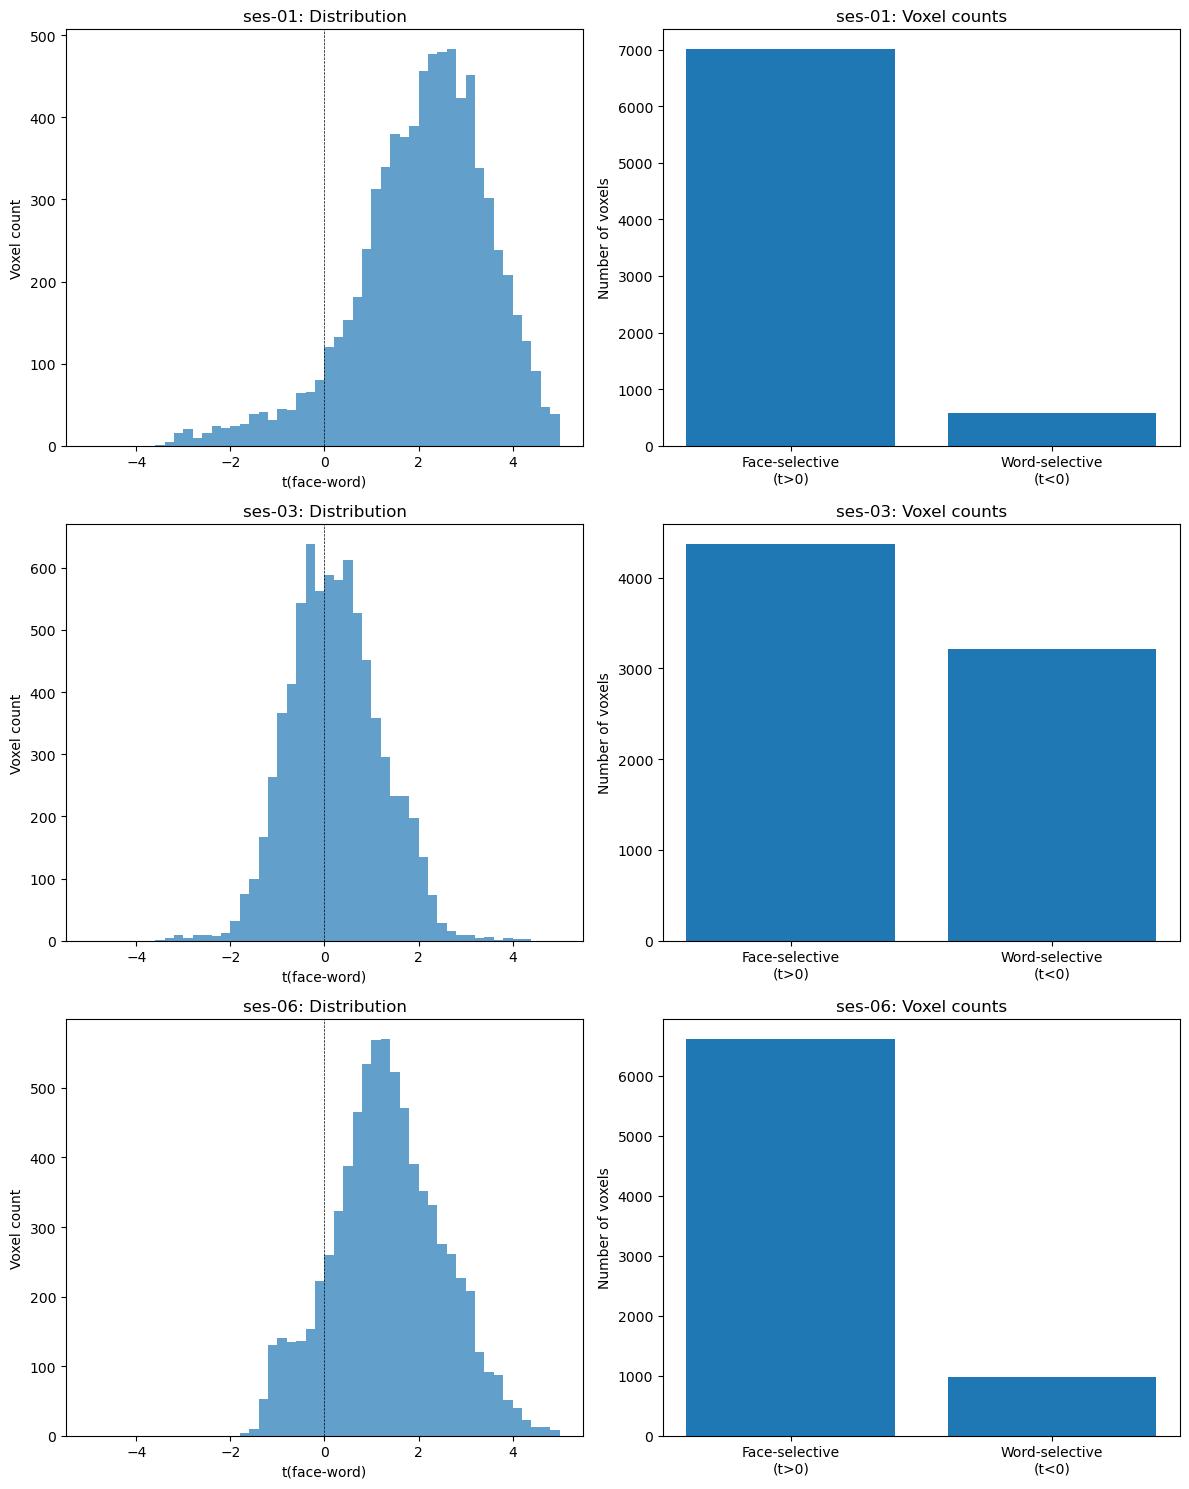

In [7]:
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt

print("="*70)
print("VISUAL COMPARISON TO LIU'S FIGURE 5")
print("="*70)

base = '/user_data/csimmon2/long_pt'

# For sub-004, compare ses-01 vs ses-03 (should show change if real)
sessions_to_plot = ['01', '03', '06']

fig, axes = plt.subplots(len(sessions_to_plot), 2, figsize=(12, 15))

for idx, ses in enumerate(sessions_to_plot):
    # Load data
    roi = nib.load(f'{base}/sub-004/ses-01/ROIs/l_VOTC_FG_OTS_mask.nii.gz')
    zstat = nib.load(f'{base}/sub-004/ses-{ses}/derivatives/fsl/loc/HighLevel.gfeat/cope13.feat/stats/zstat1.nii.gz')
    
    roi_data = roi.get_fdata()
    zstat_data = zstat.get_fdata()
    
    # Extract ROI values
    roi_mask = roi_data > 0
    roi_vals = zstat_data[roi_mask]
    
    # Histogram of t-values in ROI
    axes[idx, 0].hist(roi_vals, bins=50, range=(-5, 5), alpha=0.7)
    axes[idx, 0].axvline(0, color='black', linestyle='--', linewidth=0.5)
    axes[idx, 0].set_title(f'ses-{ses}: Distribution')
    axes[idx, 0].set_xlabel('t(face-word)')
    axes[idx, 0].set_ylabel('Voxel count')
    
    # Show how many voxels are face vs word selective
    face_selective = np.sum(roi_vals > 0)
    word_selective = np.sum(roi_vals < 0)
    
    axes[idx, 1].bar(['Face-selective\n(t>0)', 'Word-selective\n(t<0)'], 
                      [face_selective, word_selective])
    axes[idx, 1].set_title(f'ses-{ses}: Voxel counts')
    axes[idx, 1].set_ylabel('Number of voxels')
    
    print(f"\nses-{ses}:")
    print(f"  Face-selective voxels (t>0): {face_selective} ({face_selective/len(roi_vals)*100:.1f}%)")
    print(f"  Word-selective voxels (t<0): {word_selective} ({word_selective/len(roi_vals)*100:.1f}%)")
    print(f"  Mean: {roi_vals.mean():.3f}")

plt.tight_layout()
plt.savefig(f'{base}/analyses/sub004_distribution_comparison.png', dpi=150)
print(f"\nSaved to: {base}/analyses/sub004_distribution_comparison.png")

print("\n" + "="*70)
print("INTERPRETATION:")
print("="*70)
print("Liu's UD showed: progressively MORE red voxels (face-selective)")
print("Check your plot: Do you see the distribution shifting RIGHT over time?")
print("Or does it shift LEFT (more word-selective)?")

In [4]:
print("="*70)
print("QUANTIFYING MISALIGNMENT")
print("="*70)

import nibabel as nib
import numpy as np

sub = 'sub-004'
sessions = ['01', '02', '03', '05', '06']
base = '/user_data/csimmon2/long_pt'

# Load all affines
affines = {}
for ses in sessions:
    zstat_file = f'{base}/{sub}/ses-{ses}/derivatives/fsl/loc/HighLevel.gfeat/cope13.feat/stats/zstat1.nii.gz'
    img = nib.load(zstat_file)
    affines[ses] = img.affine

# Compare each to ses-01
ref_affine = affines['01']

print("Affine differences from ses-01:\n")
for ses in ['02', '03', '05', '06']:
    diff = np.abs(affines[ses] - ref_affine)
    max_diff = diff.max()
    
    # Check translation component (last column, first 3 rows)
    translation_diff = np.abs(affines[ses][:3, 3] - ref_affine[:3, 3])
    
    print(f"ses-{ses}:")
    print(f"  Max affine difference: {max_diff:.2f}")
    print(f"  Translation offset: {translation_diff} mm")
    print(f"  Mean translation: {translation_diff.mean():.2f} mm")

print("\n" + "="*70)
print("DIAGNOSIS:")
print("="*70)
print("Sessions are NOT in the same coordinate space!")
print("Your HighLevel registration to ses-01 FAILED.")
print("\nThis explains EVERYTHING:")
print("- You're extracting from different brain regions each session")
print("- Patterns look bizarre because you're measuring different voxels")
print("- Sub-021 'worked' by chance")
print("\nYou need to:")
print("1. Fix HighLevel registration to properly align to ses-01")
print("2. OR use the script from earlier (09_highLevel.py) to register")
print("   all outputs to ses-01 space post-hoc")
print("3. Then re-extract statistics")

QUANTIFYING MISALIGNMENT


Affine differences from ses-01:

ses-02:
  Max affine difference: 4.00
  Translation offset: [4. 0. 0.] mm
  Mean translation: 1.33 mm
ses-03:
  Max affine difference: 1.00
  Translation offset: [1. 0. 0.] mm
  Mean translation: 0.33 mm
ses-05:
  Max affine difference: 7.00
  Translation offset: [7. 0. 0.] mm
  Mean translation: 2.33 mm
ses-06:
  Max affine difference: 4.00
  Translation offset: [4. 0. 0.] mm
  Mean translation: 1.33 mm

DIAGNOSIS:
Sessions are NOT in the same coordinate space!
Your HighLevel registration to ses-01 FAILED.

This explains EVERYTHING:
- You're extracting from different brain regions each session
- Patterns look bizarre because you're measuring different voxels
- Sub-021 'worked' by chance

You need to:
1. Fix HighLevel registration to properly align to ses-01
2. OR use the script from earlier (09_highLevel.py) to register
   all outputs to ses-01 space post-hoc
3. Then re-extract statistics


In [9]:
print("="*70)
print("CHECKING SUB-021 (TC) - SESSIONS 01 vs 03 ONLY")
print("="*70)

import nibabel as nib
import numpy as np

sub = 'sub-021'
sessions = ['01', '03']  # Only these two
base = '/user_data/csimmon2/long_pt'

affines = {}
for ses in sessions:
    zstat_file = f'{base}/{sub}/ses-{ses}/derivatives/fsl/loc/HighLevel.gfeat/cope13.feat/stats/zstat1.nii.gz'
    img = nib.load(zstat_file)
    affines[ses] = img.affine
    print(f"ses-{ses}: loaded ✓")

ref_affine = affines['01']
diff = np.abs(affines['03'] - ref_affine)
max_diff = diff.max()
translation_diff = np.abs(affines['03'][:3, 3] - ref_affine[:3, 3])

print(f"\nses-03 vs ses-01:")
print(f"  Max affine difference: {max_diff:.2f}")
print(f"  Translation offset: {translation_diff} mm")
print(f"  Mean translation: {translation_diff.mean():.2f} mm")

print("\n" + "="*70)
print("COMPARISON:")
print("="*70)
print(f"sub-004 (UD): 1-7mm misalignment")
print(f"sub-021 (TC): {translation_diff.mean():.2f}mm misalignment")
print("\nIf similar → misalignment is normal/not the problem")
print("If different → sub-004 has specific registration issues")

CHECKING SUB-021 (TC) - SESSIONS 01 vs 03 ONLY
ses-01: loaded ✓


ses-03: loaded ✓

ses-03 vs ses-01:
  Max affine difference: 9.00
  Translation offset: [0. 9. 2.] mm
  Mean translation: 3.67 mm

COMPARISON:
sub-004 (UD): 1-7mm misalignment
sub-021 (TC): 3.67mm misalignment

If similar → misalignment is normal/not the problem
If different → sub-004 has specific registration issues
